In [17]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install opencv-contrib-python


In [19]:
import cv2
print(cv2.__version__)


4.10.0


Converged in 13 iterations!


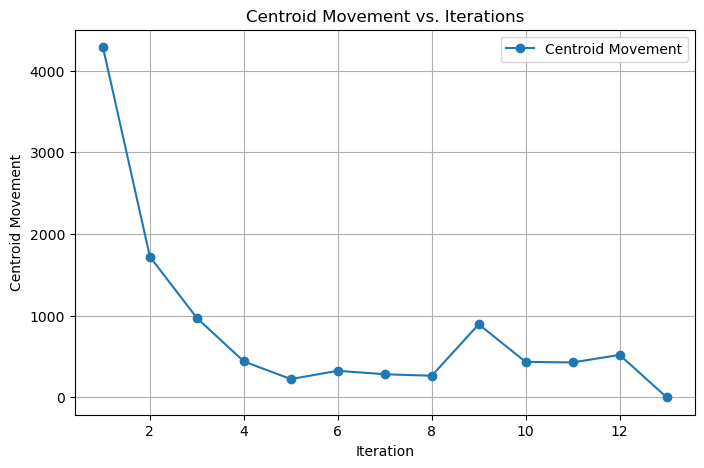

Converged in 11 iterations!


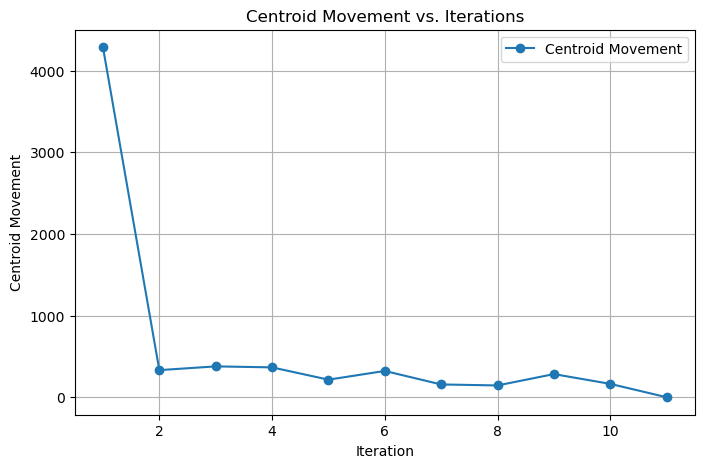

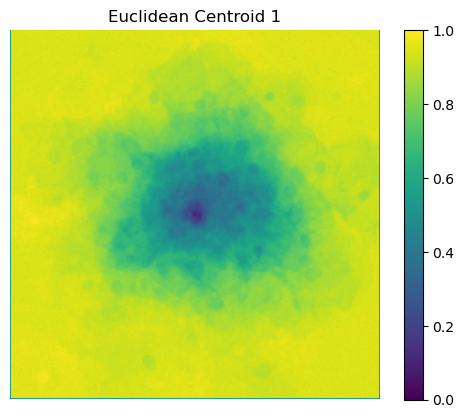

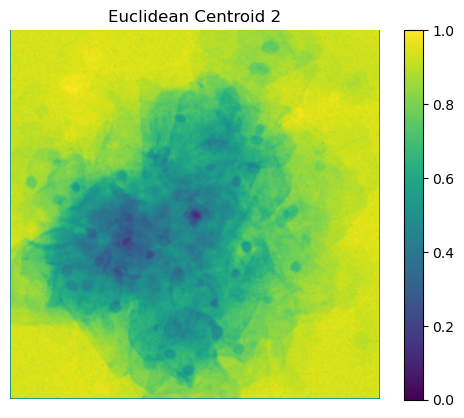

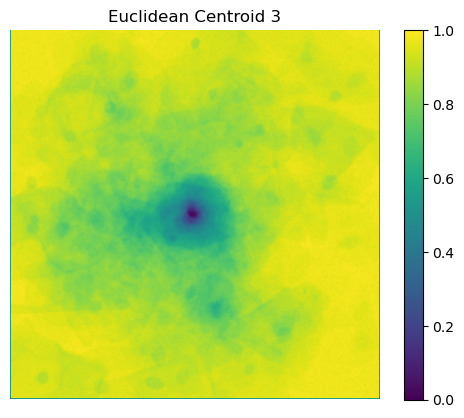

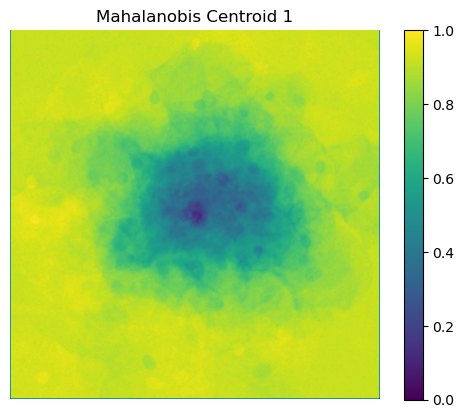

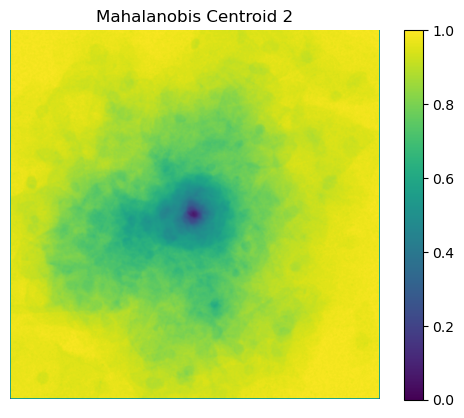

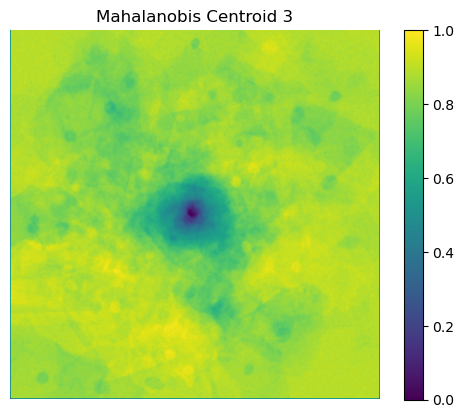

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from glob import glob
import cv2

# Define the Mahalanobis distance function
def mahalanobis_dist(x1, x2, cov_matrix):
    mean_diff = x1 - x2
    try:
        cov_matrix_inv = np.linalg.inv(cov_matrix)
    except np.linalg.LinAlgError:
        cov_matrix_inv = np.linalg.pinv(cov_matrix)  # Use pseudo-inverse if singular
    distance = np.sqrt(np.dot(np.dot(mean_diff.T, cov_matrix_inv), mean_diff))
    return distance

# Define the KMeans clustering function
def KMeansClustering(X, K, maxIteration, mod: bool, tolerance=1e-4):
    m = X.shape[0]
    np.random.seed(42)
    centroids = X[np.random.choice(m, K, replace=False)]
    idx = np.zeros(m, dtype=int)
    prevCentroid = np.zeros_like(centroids)

    iteration_list = []
    centroid_movements = []

    for i in range(maxIteration):
        if mod:
            # Calculate Mahalanobis distances
            dist = np.zeros((m, K))
            for k in range(K):
                # Compute covariance matrix for each cluster dynamically
                points_in_cluster = X[idx == k]
                cov_matrix = (
                    np.cov(points_in_cluster, rowvar=False) 
                    if len(points_in_cluster) > 1 
                    else np.cov(X, rowvar=False)
                )
                cov_matrix += np.eye(cov_matrix.shape[0]) * 1e-6  # Regularization
                for j in range(m):
                    dist[j, k] = mahalanobis_dist(X[j], centroids[k], cov_matrix)
        else:
            # Euclidean distance
            dist = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

        # Assign clusters
        idx = np.argmin(dist, axis=1)
        prevCentroid = centroids.copy()

        # Update centroids
        for k in range(K):
            points = X[idx == k]
            if len(points) > 0:
                centroids[k] = np.mean(points, axis=0)

        # Compute centroid movement
        centroid_movement = np.linalg.norm(centroids - prevCentroid)
        iteration_list.append(i + 1)
        centroid_movements.append(centroid_movement)

        if centroid_movement < tolerance:
            print(f"Converged in {i + 1} iterations!")
            break

    # Plot centroid movement
    plt.figure(figsize=(8, 5))
    plt.plot(iteration_list, centroid_movements, marker='o', label="Centroid Movement")
    plt.title("Centroid Movement vs. Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Centroid Movement")
    plt.grid(True)
    plt.legend()
    plt.show()

    return centroids, idx

# Function to visualize centroids as smoothed images
def visualize_centroid_images_smooth(centroids, pca, title_prefix):
    for i, p in enumerate(centroids):
        # Inverse PCA transformation
        tp = pca.inverse_transform(p)
        restored_image = tp.reshape(512, 512)  # Reshape to original dimensions (adjust as needed)

        # Normalize the image for visualization
        normalized_image = (restored_image - restored_image.min()) / (restored_image.max() - restored_image.min())

        plt.imshow(normalized_image, cmap='viridis')
        plt.colorbar()
        plt.title(f"{title_prefix} Centroid {i + 1}")
        plt.axis("off")
        plt.show()

if __name__ == "__main__":
    # Load train and test images
    train_folder = r"C:\Users\nitip\OneDrive\Desktop\dec2024\group04\Train"
    test_folder = r"C:\Users\nitip\OneDrive\Desktop\dec2024\group04\Test"

    train_images = glob(f"{train_folder}/*.png")
    test_images = glob(f"{test_folder}/*.png")
    all_images = train_images + test_images

    # Read and flatten images
    X = [cv2.imread(file, cv2.IMREAD_GRAYSCALE).flatten() for file in all_images]
    X = np.array(X)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Apply KMeans clustering with Euclidean distance
    centroidEuclid, idxEuclid = KMeansClustering(X_pca, K=3, maxIteration=100, mod=False)

    # Apply KMeans clustering with Mahalanobis distance
    centroidMahalanobis, idxMahalanobis = KMeansClustering(X_pca, K=3, maxIteration=100, mod=True)

    # Visualize centroid images (Euclidean)
    visualize_centroid_images_smooth(centroidEuclid, pca, "Euclidean")

    # Visualize centroid images (Mahalanobis)
    visualize_centroid_images_smooth(centroidMahalanobis, pca, "Mahalanobis")


In [22]:
pip install matplotlib numpy scikit-learn opencv-python

Covariance Matrix:
[[ 9.54857647e+06 -1.51715452e-09]
 [-1.51715452e-09  8.57814079e+06]]

Mean of the data:
[-6.45308146e-12 -5.34508593e-12]
Converged in 13 iterations!


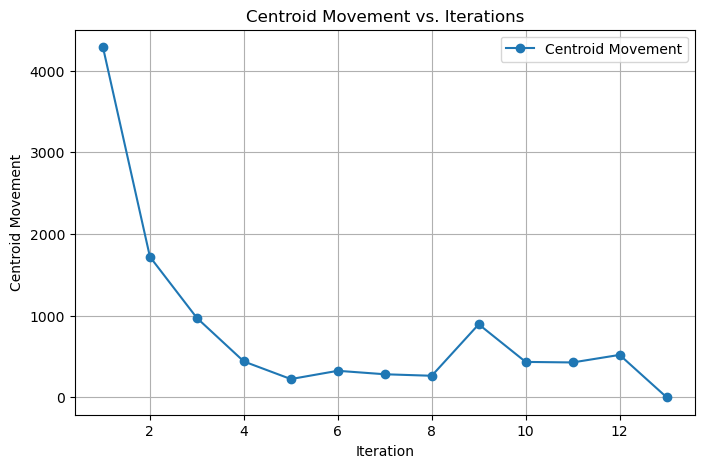

Covariance Matrix:
[[ 9.54857647e+06 -1.51715452e-09]
 [-1.51715452e-09  8.57814079e+06]]

Mean of the data:
[-6.45308146e-12 -5.34508593e-12]
Converged in 12 iterations!


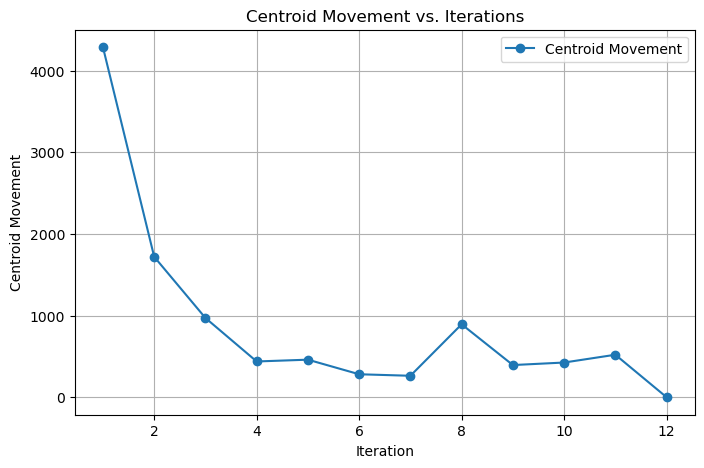

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the Mahalanobis distance
def mahalanobis_dist(x1, x2, cov_matrix):
    mean_diff = x1 - x2
    cov_matrix_inv = np.linalg.inv(cov_matrix)
    distance = np.sqrt(np.dot(np.dot(mean_diff.T, cov_matrix_inv), mean_diff))
    return distance

# Define the KMeans clustering function
def KMeansClustering(X, K, maxIteration, mod: bool, tolerance=1e-4):
    m = X.shape[0]
    np.random.seed(42)
    centroids = X[np.random.choice(m, K, replace=False)]
    idx = np.zeros(m, dtype=int)
    prevCentroid = np.zeros_like(centroids)
    cov = np.cov(X, rowvar=False)
    
    print("Covariance Matrix:")
    print(cov)
    print("\nMean of the data:")
    print(np.mean(X, axis=0))
    
    iteration_list = []
    centroid_movements = []

    for i in range(maxIteration):
        if mod:
            dist = np.zeros((m, K))
            for j in range(m):
                for k in range(K):
                    dist[j, k] = mahalanobis_dist(X[j], centroids[k], cov)
        else:
            dist = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        
        idx = np.argmin(dist, axis=1)
        prevCentroid = centroids.copy()
        
        for k in range(K):
            points = X[idx == k]
            if len(points) > 0:
                centroids[k] = np.mean(points, axis=0)
        
        centroid_movement = np.linalg.norm(centroids - prevCentroid)
        iteration_list.append(i + 1)
        centroid_movements.append(centroid_movement)
        
        if centroid_movement < tolerance:
            print(f"Converged in {i + 1} iterations!")
            break

    # Plot the centroid movement
    plt.figure(figsize=(8, 5))
    plt.plot(iteration_list, centroid_movements, marker='o', label="Centroid Movement")
    plt.title("Centroid Movement vs. Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Centroid Movement")
    plt.grid(True)
    plt.legend()
    plt.show()
        
    return centroids, idx

# Function to restore and visualize centroid images with smooth gradients and custom colors
def visualize_centroid_images_smooth(centroids, pca, title_prefix):
    for i, p in enumerate(centroids):
        # Transform centroid back to original dimensions
        tp = pca.inverse_transform(p)
        restored_image = tp.reshape(512, 512)  # Adjust shape to your dataset

        # Normalize the restored image to the range [0, 1]
        normalized_image = (restored_image - restored_image.min()) / (restored_image.max() - restored_image.min())

        # Use a colormap for smooth blending (e.g., "viridis" or custom)
        plt.imshow(normalized_image, cmap='viridis')
        plt.colorbar()  # Add a color bar for better interpretation
        plt.title(f"{title_prefix} Centroid {i + 1}")
        plt.axis("off")
        plt.show()

# Example usage
if __name__ == "__main__":
    # Load your dataset here (example: flattened images)
    # Replace with your actual dataset loading logic
    train_folder = r"C:\Users\nitip\OneDrive\Desktop\dec2024\group04\Train"
    test_folder = r"C:\Users\nitip\OneDrive\Desktop\dec2024\group04\Test"
    
    from glob import glob
    import cv2

    # Collect all image paths
    train_images = glob(f"{train_folder}/*.png")
    test_images = glob(f"{test_folder}/*.png")
    all_images = train_images + test_images

    # Flatten images into a matrix
    X = [cv2.imread(file, cv2.IMREAD_GRAYSCALE).flatten() for file in all_images]
    X = np.array(X)

    # Apply PCA to reduce dimensions for clustering
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Apply KMeans clustering (Euclidean)
    centroidEuclid, idxEuclid = KMeansClustering(X_pca, K=3, maxIteration=100, mod=False)

    # Apply KMeans clustering (Mahalanobis)
    centroidma, idxma = KMeansClustering(X_pca, K=3, maxIteration=100, mod=True)

    


Converged in 4 iterations!
Converged in 4 iterations!
Number of data points (1) is less than clusters requested (3). Setting K to m.
Converged in 1 iterations!
Number of data points (1) is less than clusters requested (3). Setting K to m.
Converged in 1 iterations!


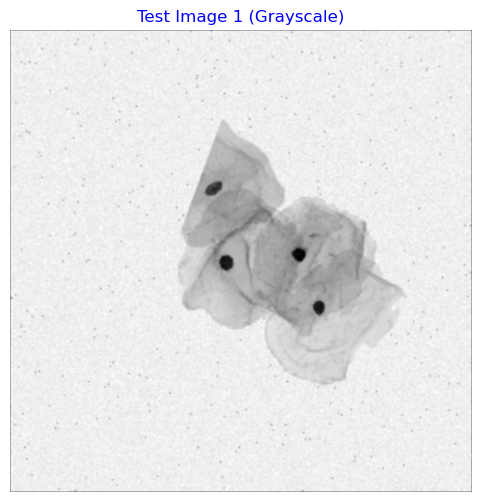

ValueError: cannot reshape array of size 1 into shape (512,512)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Define the Mahalanobis distance
def mahalanobis_dist(x1, x2, cov_matrix):
    mean_diff = x1 - x2
    cov_matrix_inv = np.linalg.inv(cov_matrix)
    distance = np.sqrt(np.dot(np.dot(mean_diff.T, cov_matrix_inv), mean_diff))
    return distance

# Define the KMeans clustering function
def KMeansClustering(X, K, maxIteration, mod: bool, tolerance=1e-4):
    m = X.shape[0]
    
    # If the number of data points is less than the number of clusters,
    # adjust the value of K to match the number of data points.
    if K > m:
        print(f"Number of data points ({m}) is less than clusters requested ({K}). Setting K to m.")
        K = m
    
    np.random.seed(42)
    centroids = X[np.random.choice(m, K, replace=False)]
    idx = np.zeros(m, dtype=int)
    prevCentroid = np.zeros_like(centroids)
    cov = np.cov(X, rowvar=False)
    
    iteration_list = []
    centroid_movements = []

    for i in range(maxIteration):
        if mod:
            dist = np.zeros((m, K))
            for j in range(m):
                for k in range(K):
                    dist[j, k] = mahalanobis_dist(X[j], centroids[k], cov) if X.shape[0] > 1 else np.linalg.norm(X[j] - centroids[k])
        else:
            dist = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        
        idx = np.argmin(dist, axis=1)
        prevCentroid = centroids.copy()
        
        for k in range(K):
            points = X[idx == k]
            if len(points) > 0:
                centroids[k] = np.mean(points, axis=0)
        
        centroid_movement = np.linalg.norm(centroids - prevCentroid)
        iteration_list.append(i + 1)
        centroid_movements.append(centroid_movement)
        
        if centroid_movement < tolerance:
            print(f"Converged in {i + 1} iterations!")
            break

    return centroids, idx

# Visualize clustering results
def visualize_clustering(original_img, idx, K, title):
    h, w = original_img.shape
    idx = idx.reshape(h, w)  # Reshape back to original image shape

    # Create an empty image to hold the clustered output
    clustered_image = np.zeros((h, w), dtype=np.uint8)

    # Assign colors (clusters are represented by different intensities)
    for k in range(K):
        clustered_image[idx == k] = int(255 / (K - 1)) * k  # Give distinct gray values to each cluster
    
    # Display the clustered image
    plt.figure(figsize=(6, 6))
    plt.title(title, fontsize=12, color="blue")
    plt.axis("off")
    plt.imshow(clustered_image, cmap="gray")  # Show the grayscale image with clusters
    plt.show()

# Load and preprocess images
def load_image_as_flattened_vector(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    if img is None:
        raise FileNotFoundError(f"Image not found at the specified path: {image_path}")
    return img, img.flatten()

# Load test images from the test folder
def load_test_images(test_folder_path, img_size=(512, 512)):
    test_images = []
    for filename in os.listdir(test_folder_path):
        if filename.endswith(".png"):  # Change or add other formats if needed
            img_path = os.path.join(test_folder_path, filename)
            img, _ = load_image_as_flattened_vector(img_path)
            img_resized = cv2.resize(img, img_size)  # Resize images to the required size
            test_images.append(img_resized)
    return test_images

# Main
if __name__ == "__main__":
    train_image_folder = r"C:\Users\nitip\OneDrive\Desktop\dec2024\group04\train"
    test_image_folder = r"C:\Users\nitip\OneDrive\Desktop\dec2024\group04\test"

    try:
        # Load training images
        train_images = []
        train_flattened_images = []
        for filename in os.listdir(train_image_folder):
            if filename.endswith(".png"):
                img_path = os.path.join(train_image_folder, filename)
                img, flattened = load_image_as_flattened_vector(img_path)
                train_images.append(img)
                train_flattened_images.append(flattened)
        
        # Flatten and apply PCA
        train_flattened_images = np.array(train_flattened_images)
        pca = PCA(n_components=2)
        X_train_pca = pca.fit_transform(train_flattened_images)
        
        # Apply KMeans clustering to the training images (Euclidean and Mahalanobis)
        _, idxEuclid = KMeansClustering(X_train_pca, K=3, maxIteration=100, mod=False)
        _, idxma = KMeansClustering(X_train_pca, K=3, maxIteration=100, mod=True)

        # Load test images
        test_images_data = load_test_images(test_image_folder)

        for i, test_image in enumerate(test_images_data[:3]):  # Process first 3 test images
            test_image_reshaped = test_image.reshape(512, 512)  # Reshape to original 2D size
            
            # Apply PCA to test image
            test_image_flattened = test_image.flatten().reshape(1, -1)  # Flatten image for PCA
            X_test_pca = pca.transform(test_image_flattened)

            # Apply KMeans clustering (Euclidean)
            _, idxEuclidTest = KMeansClustering(X_test_pca, K=3, maxIteration=100, mod=False)

            # Apply KMeans clustering (Mahalanobis)
            _, idxmaTest = KMeansClustering(X_test_pca, K=3, maxIteration=100, mod=True)

            # Visualize original test image
            plt.figure(figsize=(6, 6))
            plt.title(f"Test Image {i + 1} (Grayscale)", fontsize=12, color="blue")
            plt.axis("off")
            plt.imshow(test_image_reshaped, cmap="gray")
            plt.show()

            # Visualize clustered output for K-Means (Euclidean)
            visualize_clustering(test_image_reshaped, idxEuclidTest, 3, f"K-Means (Euclidean) for Test Image {i + 1}")

            # Visualize clustered output for K-Means (Mahalanobis)
            visualize_clustering(test_image_reshaped, idxmaTest, 3, f"Modified K-Means (Mahalanobis) for Test Image {i + 1}")

    except FileNotFoundError as e:
        print(str(e))
